# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [5]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
print(a[-3:])
# reverse the list
print(a[::-1])
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
print([i ** 2 for i in a])

[4, 5, 6]
[6, 5, 4, 3, 2, 1]
[1, 4, 9, 16, 25, 36]


In [7]:
# create a numpy array from this list
import numpy as np
b = np.array(a)
print(b)

[1 2 3 4 5 6]


In [8]:
# find the mean of b
print(np.mean(b))

3.5


In [10]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
b = np.square(a)
print(b)

[ 1  4  9 16 25 36]


In [22]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape((2,3))
print(b)

[[ 1  4  9]
 [16 25 36]]


In [23]:
# find the mean value of each row
print(np.mean(b,axis=1))

[ 4.66666667 25.66666667]


In [24]:
# find the mean value of each column
print(np.mean(b,axis=0))

[ 8.5 14.5 22.5]


In [27]:
# find the third column of b
print(b[:,2])

[ 9 36]


In [1]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')
df.head(3)

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,coffee,brewed coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0


In [57]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

193.87190082644628

In [58]:
# how many different categories of beverages are there?
df['beverage_category'].unique().shape[0]

9

In [59]:
# what is the average # calories for each beverage category?
bvcat = df.groupby('beverage_category')
bvcat['calories'].mean()

beverage_category
classic espresso drinks             140.172414
coffee                                4.250000
frappuccino blended coffee          276.944444
frappuccino blended creme           233.076923
frappuccino light blended coffee    162.500000
shaken iced beverages               114.444444
signature espresso drinks           250.000000
smoothies                           282.222222
tazo tea drinks                     177.307692
Name: calories, dtype: float64

In [60]:
# what beverage preparation includes the most sugar on average?
bvcat['sugars'].mean().idxmax()

'frappuccino blended coffee'

In [61]:
# what is the average % daily value calcium content for each beverage?
bvcat['calcium'].mean()

beverage_category
classic espresso drinks             27.344828
coffee                               0.500000
frappuccino blended coffee          12.277778
frappuccino blended creme           13.846154
frappuccino light blended coffee    11.333333
shaken iced beverages                4.000000
signature espresso drinks           31.375000
smoothies                           13.333333
tazo tea drinks                     23.653846
Name: calcium, dtype: float64

In [16]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay


#To solve this problem, I'll find the beverage with the highest protein(g) / calorie ratio
df['proteinpercal'] = df['protein']/ df['calories']

bcat = df.groupby('beverage')
bcat['proteinpercal'].max().idxmax()
#very surprising. But seeing as this is starbucks, probably not the best place to get your gains

'brewed coffee'

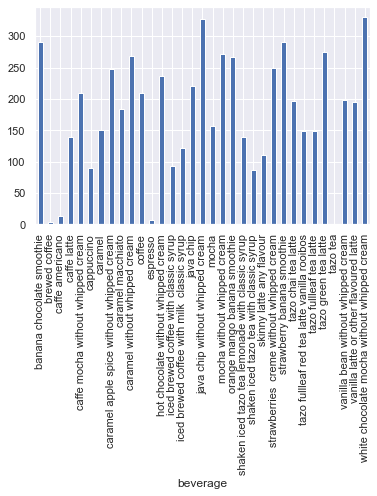

In [18]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib as plt
#print (plt.__version__)
bcat['calories'].mean().plot.bar()

0.10.1


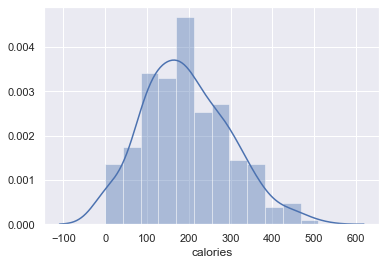

In [21]:
# plot the same distribution using seaborn. what about a density plot instead?



import seaborn as sns
print (sns.__version__)
sns.set()  # sets settings



#sns.barplot(data=df, y='beverage',x='calories')
sns.distplot(df['calories'])

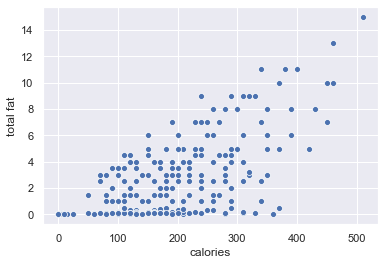

In [7]:
# plot calories against total fat using seaborn
sns.scatterplot(data = df, x='calories',y='total fat')

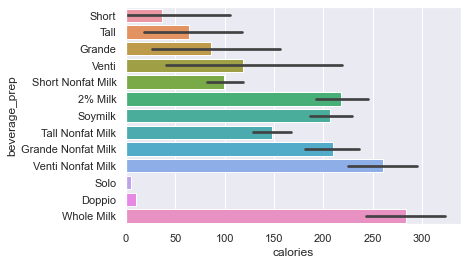

In [12]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
sns.barplot(data=df, y='beverage_prep',x='calories')